In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [3]:
review = pd.read_csv('Reviews.csv')
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print('number of total entries are equal to ', review.shape[0])

number of total entries are equal to  568454


In [5]:
#checking null values
review.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
# dropping the null values
review.dropna(inplace=True)

In [7]:
# checking whether the null values are dropped or not
review.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:

#dropping the neutral values
review = review[review['Score'] != 3]

In [9]:
review['Positivity'] = np.where(review['Score'] > 3, 1, 0)
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


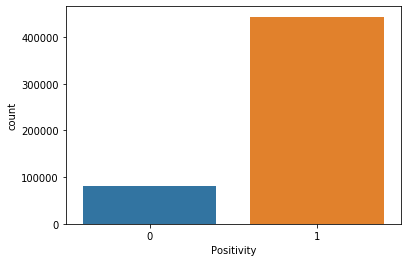

In [10]:
sns.countplot(review['Positivity'])
plt.show()

In [11]:
review.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525773 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      525773 non-null  int64 
 1   ProductId               525773 non-null  object
 2   UserId                  525773 non-null  object
 3   ProfileName             525773 non-null  object
 4   HelpfulnessNumerator    525773 non-null  int64 
 5   HelpfulnessDenominator  525773 non-null  int64 
 6   Score                   525773 non-null  int64 
 7   Time                    525773 non-null  int64 
 8   Summary                 525773 non-null  object
 9   Text                    525773 non-null  object
 10  Positivity              525773 non-null  int32 
dtypes: int32(1), int64(5), object(5)
memory usage: 434.8 MB


In [12]:
# split the data into training and testing data

# text will be used for training
# positivity is what we are predicting
X_train, X_test, y_train, y_test = train_test_split(review['Text'], review['Positivity'], random_state = 0)

In [13]:
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


X_train shape:  (394329,)


In [14]:
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
# checking the features
feat = vect.get_feature_names()
feat

['00',
 '000',
 '0000',
 '00001',
 '000013',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '004',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00m',
 '00pm',
 '00s',
 '00something',
 '01',
 '010',
 '01014',
 '01069',
 '011',
 '012',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02027c',
 '02043',
 '02115',
 '022313',
 '022413',
 '022813',
 '023',
 '024600017558',
 '025',
 '025913',
 '025968680a',
 '02604',
 '026220',
 '027',
 '0273',

In [16]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

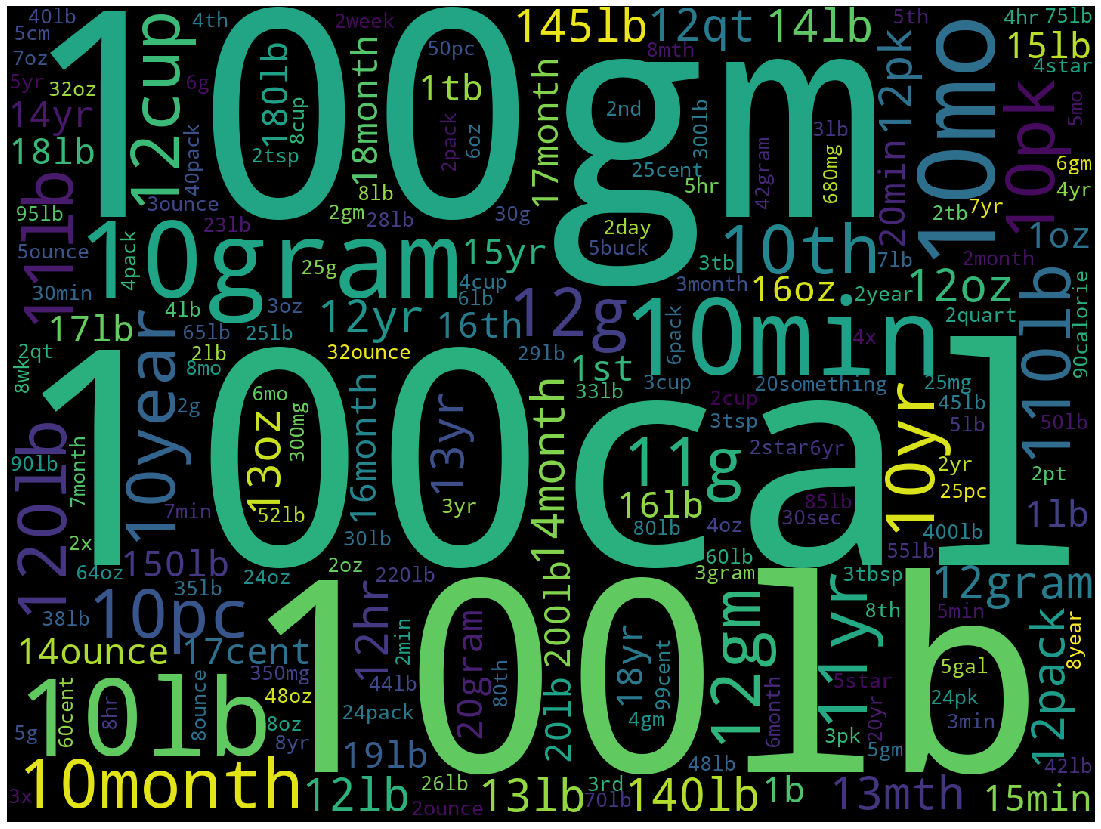

In [17]:
# larger the size of the word, more the times it appears
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [18]:
# checking the length of features
len(vect.get_feature_names())

102135

In [19]:
X_train_vectorized = vect.transform(X_train)

In [20]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# accuracy
predictions = model.predict(vect.transform(X_test))

In [22]:
accuracy_score(y_test, predictions)

0.9369997869815283

In [23]:
#h  area under the curve
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.851480253591578


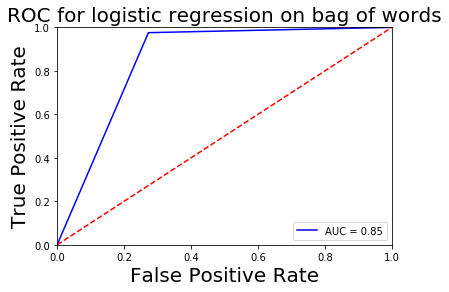

In [24]:
plt.title('ROC for logistic regression on bag of words', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [25]:
# coefficient determines the weight of a word (positivity or negativity)
# checking the top 10 positive and negative words

# getting the feature names
feature_names = np.array(vect.get_feature_names())

# argsort: Integer indicies that would sort the index if used as an indexer
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['disappointing' 'worst' 'disappointment' 'yuck' 'tasteless' 'sounded'
 'hopes' 'ruined' 'concept' 'deceptive']

Largest Coefs: 
['hooked' 'pleasantly' 'beat' 'skeptical' 'worried' 'delicious'
 'refreshing' 'favorites' 'satisfied' 'addicted']



In [26]:
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

35289

In [27]:
# check the top 10 features for positive and negative
# reviews again, the AUC has improved
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()



In [28]:
feat = vect.get_feature_names()

In [29]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

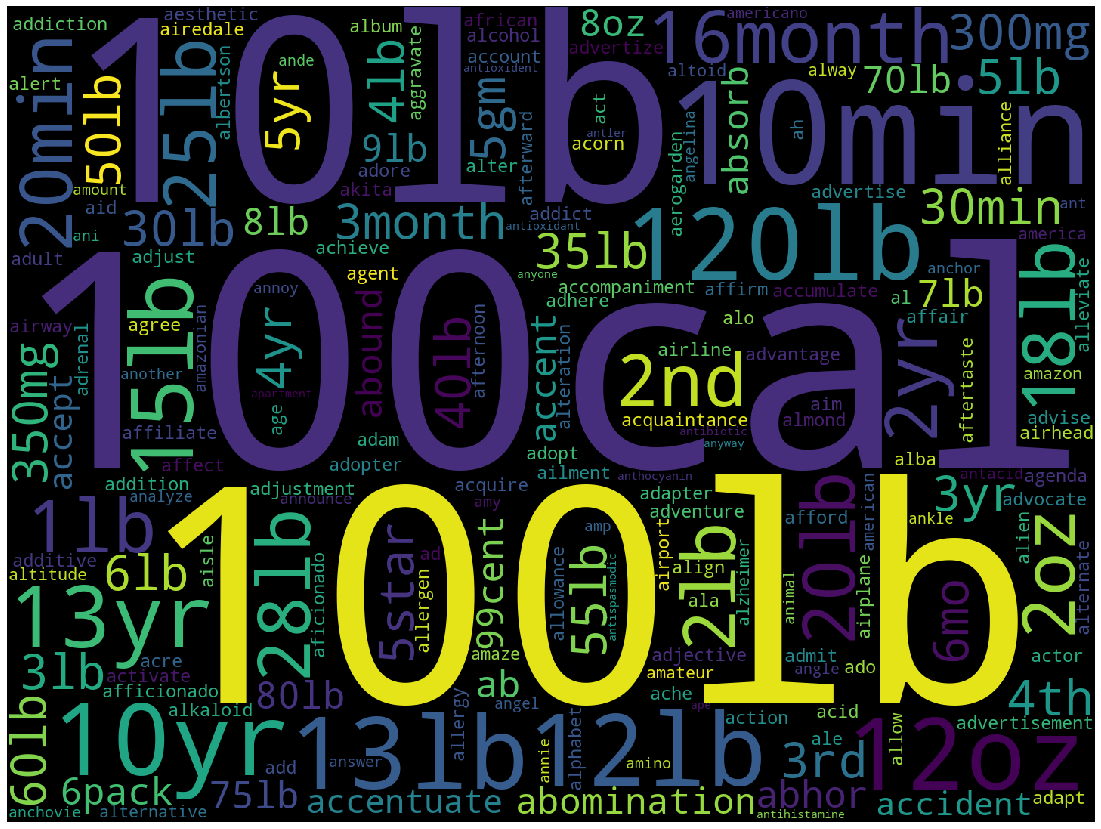

In [30]:
# larger the size of the word, more the times it appears
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [31]:
X_train_vectorized = vect.transform(X_train)

In [32]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = model.predict(vect.transform(X_test))

In [34]:
accuracy_score(y_test, predictions)

0.939365813578406

In [35]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.8511485253185977


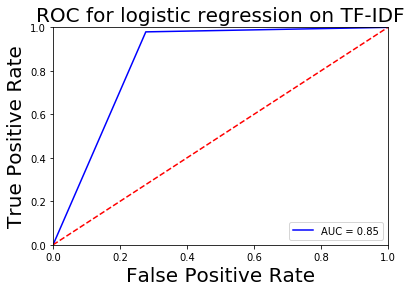

In [36]:
plt.title('ROC for logistic regression on TF-IDF', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [37]:
# even though we reduced the number of features considerably
# the AUC did not change much

# let us test our model
new_review = ['The food was delicious', 'The food was not good']

print(model.predict(vect.transform(new_review)))

[1 1]


In [38]:
#BOW AS OUR REVIEWS CAN CONTAIN 'NOT WORD ' IS ALSO INCLUDED
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

528082

In [39]:
feat = vect.get_feature_names()

In [40]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

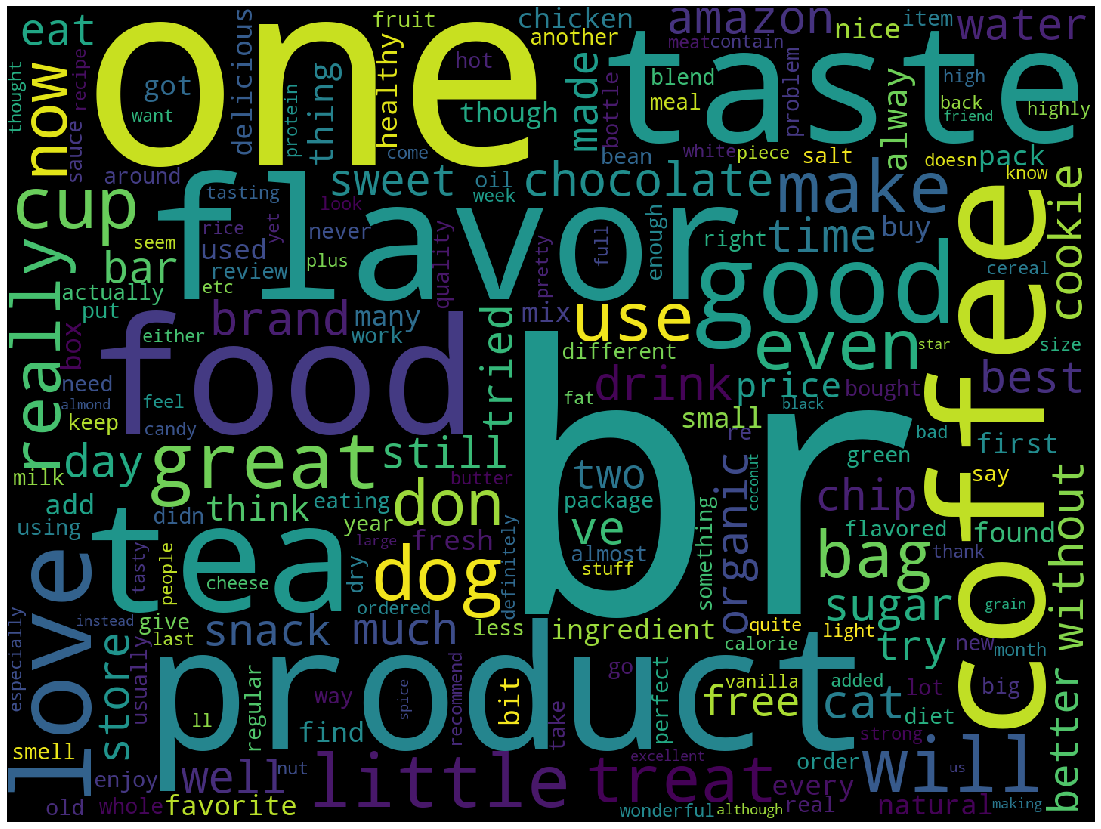

In [41]:
# larger the size of the word, more the times it appears
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [42]:
# the number of features has increased again
# checking for the AUC
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\shanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = model.predict(vect.transform(X_test))

In [44]:
accuracy_score(y_test, predictions)

0.9651258330543806

In [45]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.923970963740473


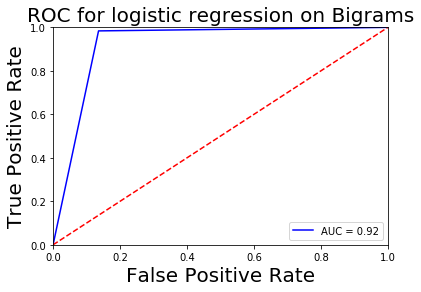

In [46]:
plt.title('ROC for logistic regression on Bigrams', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [47]:
# check the top 10 features for positive and negative
# reviews again, the AUC has improved
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

In [50]:
new_review = ['this is wonderful']
print(model.predict(vect.transform(new_review)))

[1]


In [51]:
new_review1 = ['this is good']
print(model.predict(vect.transform(new_review1)))

[1]


In [52]:
new_review2 = ['this is worst']
print(model.predict(vect.transform(new_review2)))

[0]
